In [132]:
import numpy as np
from numpy import where
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
sns.set_style("darkgrid")

In [515]:
general = pd.read_csv('General_Payments_2020.csv', parse_dates=['Date_of_Payment', 'Payment_Publication_Date'], 
                     dtype={'Teaching_Hospital_CCN': np.float32,
                            'Teaching_Hospital_ID': np.float16, 
                            'Physician_Profile_ID' : np.float32, 
                            'Total_Amount_of_Payment_USDollars': np.float32, 
                            'Number_of_Payments_in_Total_Amount': np.int16, 
                            'Record_ID': np.int32})

/Users/marcusyeo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,7,9,11,14,16,17,21,22,23,24,27,34,35,36,39,40,41,42,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [544]:
investments = pd.read_csv('Ownership_Investment_2020.csv')

In [545]:
research = pd.read_csv('Research_Payments_2020.csv')

/Users/marcusyeo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,5,7,8,9,10,17,18,19,20,21,22,23,24,32,33,38,39,43,44,45,46,51,52,53,59,60,61,95,100,101,102) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## General Dataset

In [516]:
general_raw = general.copy()
general.head()

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Type_Ind_4,Product_Category_or_Therapeutic_Area_4,Product_Name_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Ind_5,Type_Ind_5,Product_Category_or_Therapeutic_Area_5,Product_Name_5,Associated_Drug_or_Biological_NDC_5,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,557946.0,Vikas,Kumar,Pilly,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,276936.0,Matthew,NaN,Hall,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,1275463.0,Stephen,NaN,Campbell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21
3,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,268352.0,Leroy,Pearce,McCarty,III,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21
4,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,904225.0,Michael,John,Latza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21


### Using Pearson Correlation to get a sensing of different features

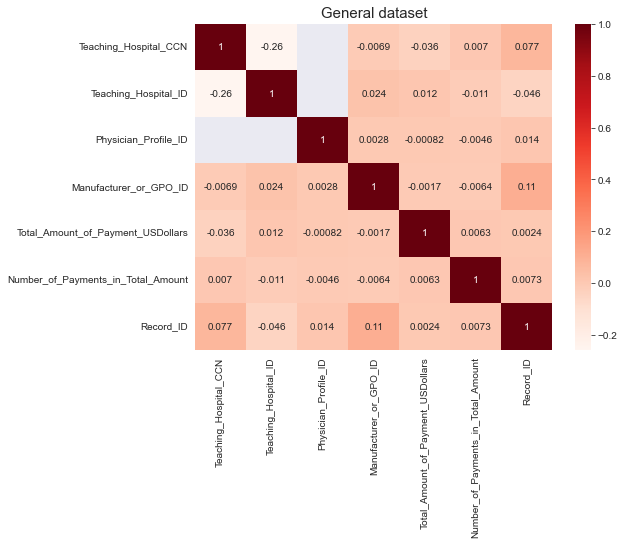

In [488]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
plt.title('General dataset',fontsize=15)
cor = general.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

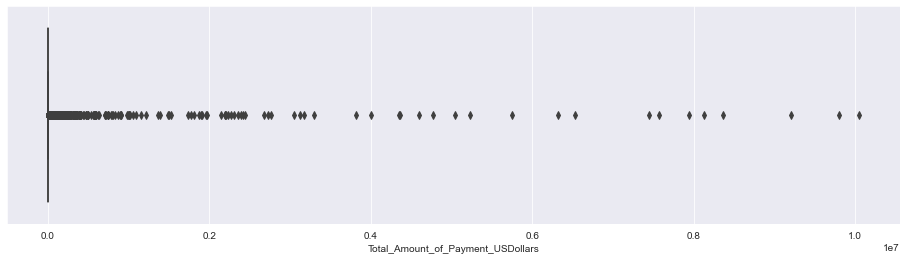

In [489]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df,x ='Total_Amount_of_Payment_USDollars')
plt.show()

### Anomaly Detection with Isolation Forests for Single Feature

/Users/marcusyeo/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


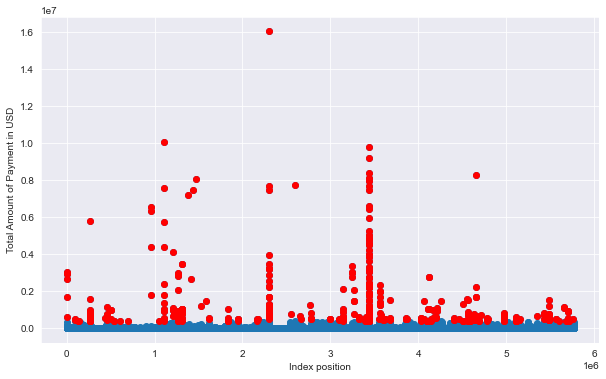

In [490]:
model = IsolationForest(contamination= 0.0001, random_state = 101)
model.fit(general[['Total_Amount_of_Payment_USDollars']])

general['index'] = general.index
general['scores'] = model.decision_function(general[['Total_Amount_of_Payment_USDollars']])
general['anomaly'] = model.predict(general[['Total_Amount_of_Payment_USDollars']])

print(general['anomaly'].value_counts())

outlier_index = where(general['anomaly'] == -1) 
outlier_values = general.iloc[outlier_index]

plt.figure(figsize=(10,6))
plt.scatter(general['index'],general['Total_Amount_of_Payment_USDollars'])
plt.scatter(outlier_values['index'], outlier_values['Total_Amount_of_Payment_USDollars'], c = "r")
plt.title('With outliers',fontsize=18)
plt.ylabel('Total Amount of Payment in USD')
plt.xlabel('Index position')
plt.show()

In [498]:
list_index = list(outlier_index[0])

In [499]:
general.drop(list_index, axis=0, inplace=True)

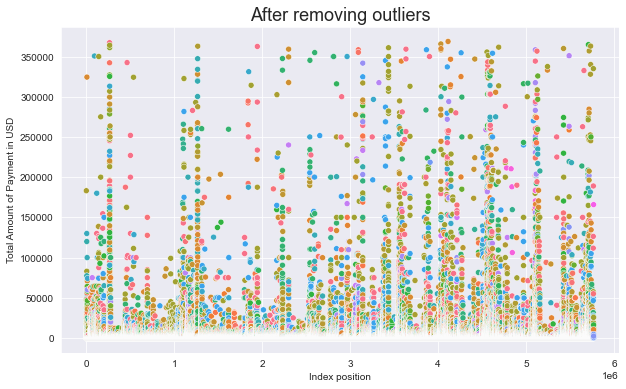

In [505]:
plt.figure(figsize=(10,6))
# plt.scatter(general['index'],general['Total_Amount_of_Payment_USDollars'])
sns.scatterplot(data=general,x='index',y='Total_Amount_of_Payment_USDollars',hue='Recipient_State',legend=False)
plt.title('After removing outliers',fontsize=18)
plt.ylabel('Total Amount of Payment in USD')
plt.xlabel('Index position')
plt.show()

### Analysing Outliers for Total Payment in General Payment

In [399]:
# outlier_values.columns

In [330]:
outlier_values.describe()

,Teaching_Hospital_CCN,Teaching_Hospital_ID,Physician_Profile_ID,Manufacturer_or_GPO_ID,Total_Amount_of_Payment_USDollars,Number_of_Payments_in_Total_Amount,Record_ID,index,scores,anomaly
count,160.00000,160.0,2.730000e+02,4.330000e+02,4.330000e+02,433.000000,4.330000e+02,4.330000e+02,433.000000,433.0
mean,171417.15625,inf,5.547838e+05,1.000000e+11,1.404148e+06,1.314088,7.373102e+08,3.000826e+06,-0.001291,-1.0
std,133656.78125,inf,1.108956e+06,9.456788e+04,1.892230e+06,2.228438,1.175616e+07,1.648609e+06,0.000231,0.0
min,10033.00000,8632.0,1.618400e+04,1.000000e+11,3.716110e+05,1.000000,7.114541e+08,2.500000e+01,-0.001771,-1.0
25%,50146.00000,9008.0,1.274990e+05,1.000000e+11,4.660606e+05,1.000000,7.254078e+08,1.312185e+06,-0.001180,-1.0
50%,110010.00000,9672.0,2.528480e+05,1.000000e+11,5.866689e+05,1.000000,7.431363e+08,3.435601e+06,-0.001180,-1.0
75%,230046.00000,9928.0,4.893040e+05,1.000000e+11,1.393243e+06,1.000000,7.464625e+08,4.183028e+06,-0.001180,-1.0
max,460009.00000,9928.0,8.804061e+06,1.000008e+11,1.602908e+07,32.000000,7.531396e+08,5.762422e+06,-0.001180,-1.0


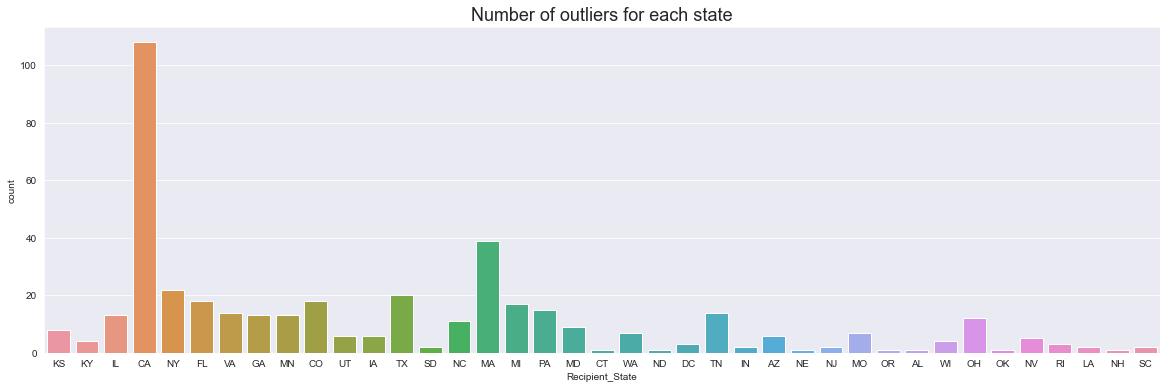

In [355]:
plt.figure(figsize=(20,6))
sns.countplot(data=outlier_values,x='Recipient_State')
plt.title('Number of outliers for each state',fontsize=18)
plt.show()

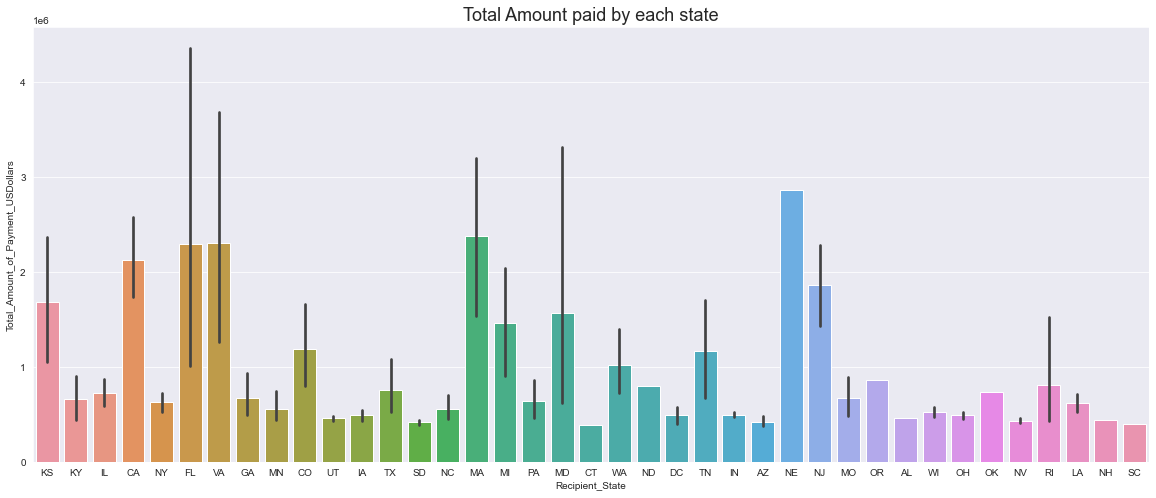

In [357]:
plt.figure(figsize=(20,8))
sns.barplot(data=outlier_values,x='Recipient_State',y='Total_Amount_of_Payment_USDollars',estimator=np.mean)
plt.title('Total Amount paid by each state',fontsize=18)
plt.show()

> Suspicious: FL, VA, MD, NE, NU

In [508]:
NE = outlier_values[outlier_values['Recipient_State'] == 'NE']
NE

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Ind_5,Type_Ind_5,Product_Category_or_Therapeutic_Area_5,Product_Name_5,Associated_Drug_or_Biological_NDC_5,Payment_Publication_Date,index,scores,anomaly
2299887,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,1008618.0,HEBER,C.,CROCKETT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,2299887,-0.001771,-1


In [507]:
# for x in NE.iloc[0]:
#     print(x)

> Conclusion: NE's single payment related to the acquisition of Avenu Medical.

In [377]:
FL = outlier_values[outlier_values['Recipient_State'] == 'FL']

In [543]:
FL.head()

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Ind_5,Type_Ind_5,Product_Category_or_Therapeutic_Area_5,Product_Name_5,Associated_Drug_or_Biological_NDC_5,Payment_Publication_Date,index,scores,anomaly
263886,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,258909.0,ANDREW,JEREMY,COOPER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,263886,-0.001771,-1
1311817,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,5705128.0,BRIAN,MICHAEL,SNELLING,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,1311817,-0.001771,-1
1311818,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,217494.0,ERIC,C.,PETERSON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,1311818,-0.001771,-1
1312185,UNCHANGED,Covered Recipient Teaching Hospital,100079.0,9472.0,University Of Miami Hosp & Clinics,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,1312185,-0.001180,-1
1943614,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,231549.0,THOMAS,W,WRIGHT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,1943614,-0.001180,-1


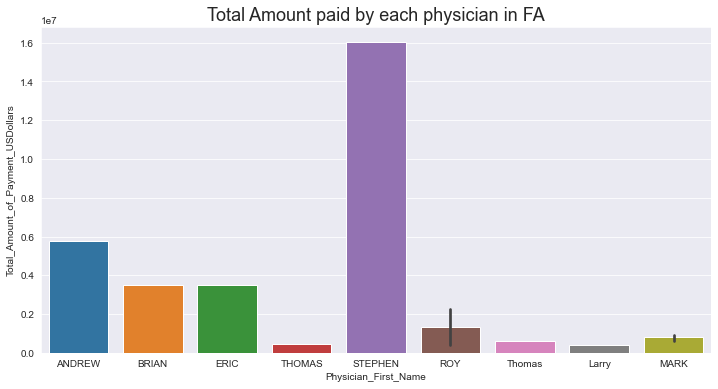

In [529]:
plt.figure(figsize=(12,6))
sns.barplot(data=FL,x='Physician_First_Name',y='Total_Amount_of_Payment_USDollars',estimator=np.mean)
plt.title('Total Amount paid by each physician in FA',fontsize=18)
plt.show()

In [520]:
# for x in general_raw.iloc[2299889]:
#     print(x)

> Conclusion: Stephen's payment related to the acquisition of Avenu Medical.

In [522]:
acq = general_raw[general_raw['Contextual_Information'] == 'Payment related to the acquisition of Avenu Medical.']

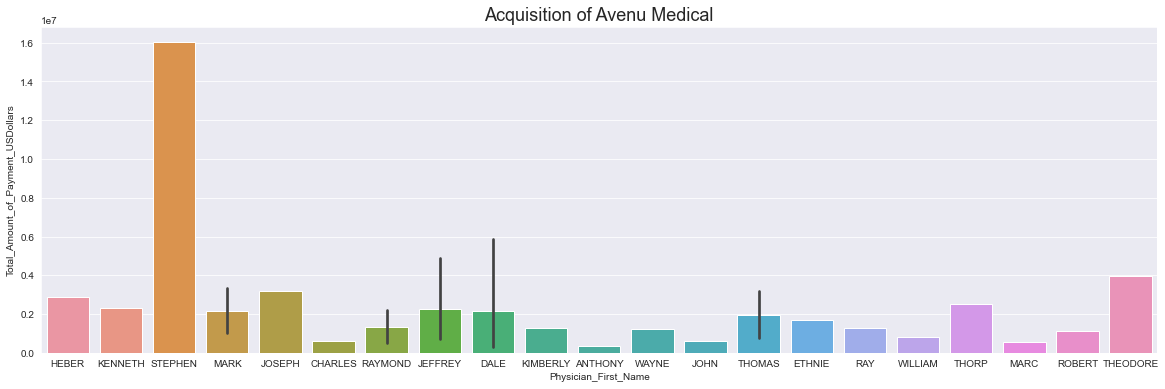

In [526]:
plt.figure(figsize=(20,6))
sns.barplot(data=acq,x='Physician_First_Name',y='Total_Amount_of_Payment_USDollars',estimator=np.mean)
plt.title('Acquisition of Avenu Medical',fontsize=18)
plt.show()

In [542]:
# for i in general_raw.iloc[2299889]:
#     print(i)

> Conclusion: Stephen is the chairman of Avenu Medical

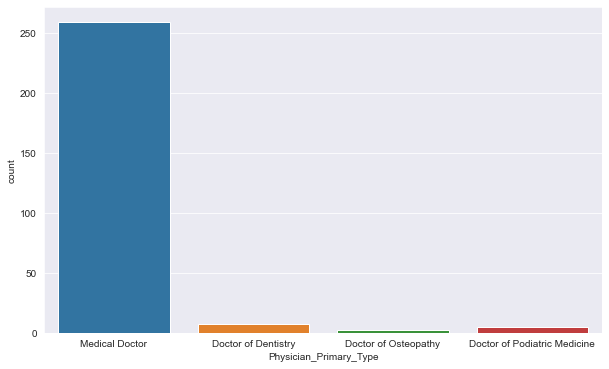

In [409]:
plt.figure(figsize=(10,6))
sns.countplot(data=outlier_values,x='Physician_Primary_Type')
plt.show()

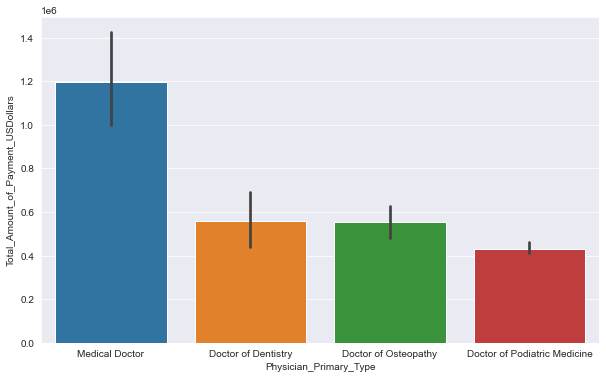

In [405]:
plt.figure(figsize=(10,6))
sns.barplot(data=outlier_values,x='Physician_Primary_Type',y='Total_Amount_of_Payment_USDollars',estimator=np.mean)
plt.show()

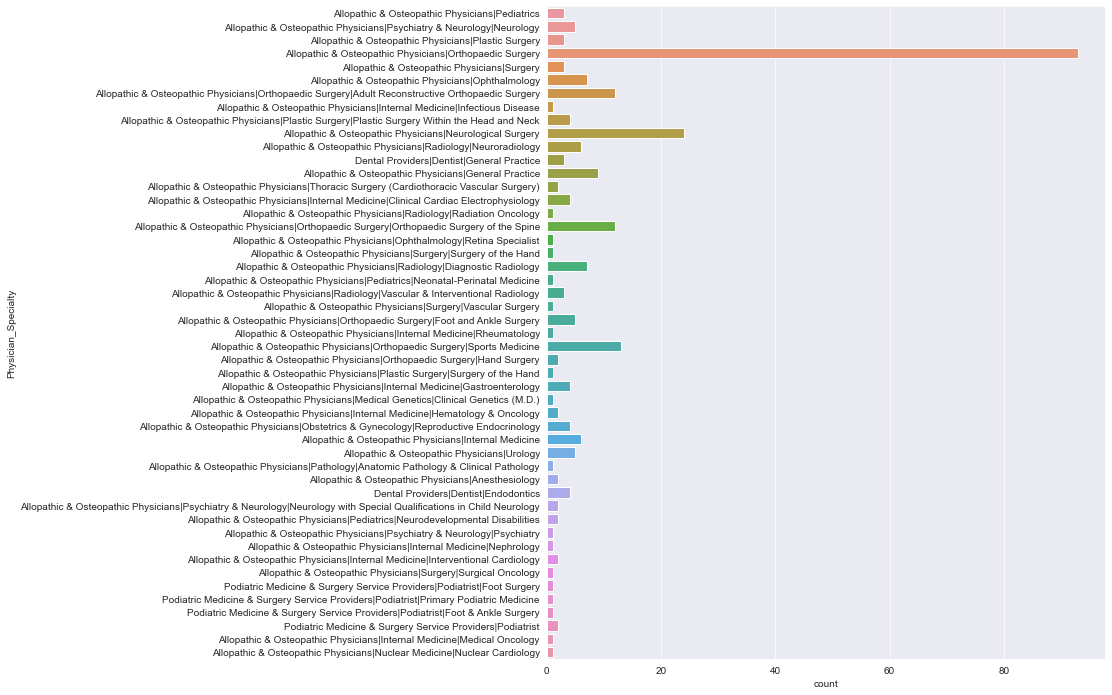

In [347]:
plt.figure(figsize=(10,12))
sns.countplot(data=outlier_values,y='Physician_Specialty')
plt.show()

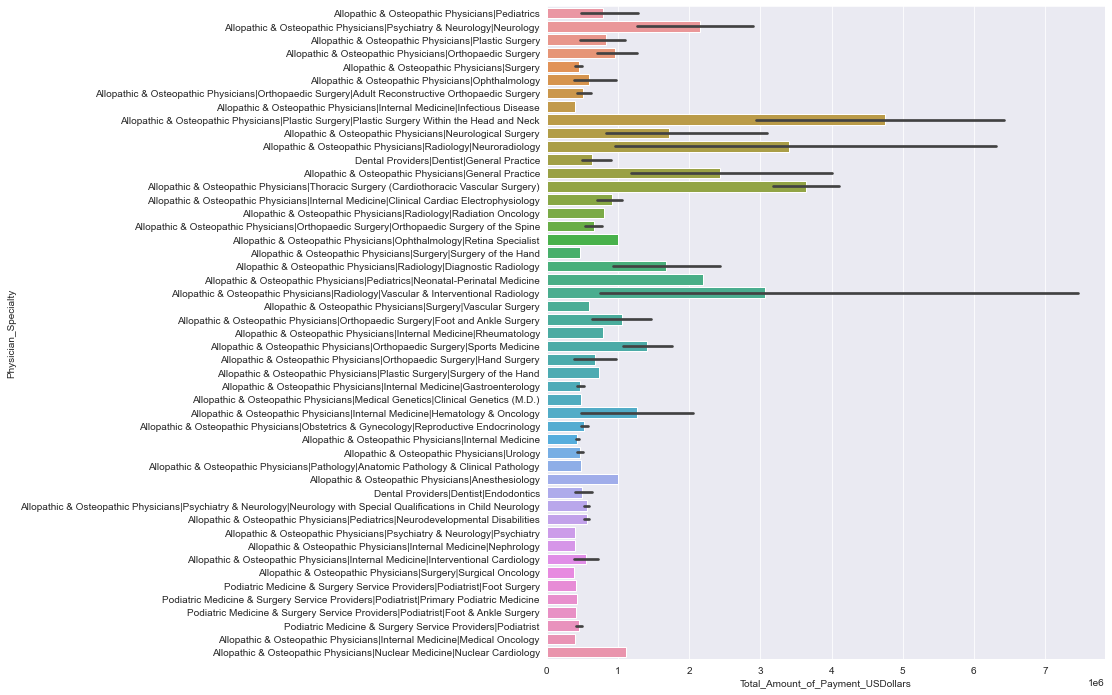

In [404]:
plt.figure(figsize=(10,12))
sns.barplot(data=outlier_values,y='Physician_Specialty',x='Total_Amount_of_Payment_USDollars',estimator=np.mean)
plt.show()

## Investments Dataset

In [546]:
investment_raw = investments.copy()
investments.head()

,Change_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Address_Line_1,Recipient_Primary_Address_Line_2,Recipient_City,Recipient_State,...,Record_ID,Total_Amount_Invested_USDollars,Value_of_Interest,Terms_of_Interest,Manufacturer_or_GPO_ID,Manufacturer_or_GPO_Name,Manufacturer_or_GPO_State,Manufacturer_or_GPO_Country,Interest_Held_by_Physician_or_Family,Payment_Publication_Date
0,UNCHANGED,134335,Aysha,NaN,Khalid,NaN,1225 Kennedy Blvd,NaN,Bayonne,NJ,...,729093639,0.0,5000.0,Common Stock,100000216802,Cornerstone Specialty Network LLC,PA,United States,Physician Covered Recipient,01/21/2022
1,UNCHANGED,997719,Jamie,NaN,Koprivnikar,NaN,39 High Street,NaN,Montclair,NJ,...,729093643,0.0,9000.0,Common Stock,100000216802,Cornerstone Specialty Network LLC,PA,United States,Physician Covered Recipient,01/21/2022
2,UNCHANGED,32057,Peter,NaN,Kourlas,NaN,810 Jasonway Ave,Suite A,Columbus,OH,...,729093645,0.0,9000.0,Common Stock,100000216802,Cornerstone Specialty Network LLC,PA,United States,Physician Covered Recipient,01/21/2022
3,UNCHANGED,887574,Gurpreet,NaN,Lamba,NaN,1 Milton Ct,NaN,Marlboro Township,NJ,...,729093649,0.0,9000.0,Common Stock,100000216802,Cornerstone Specialty Network LLC,PA,United States,Physician Covered Recipient,01/21/2022
4,UNCHANGED,138170,Craig,NaN,Lampert,NaN,75 Veronica Ave,Suite 201,Somerset,NJ,...,729093653,0.0,9000.0,Common Stock,100000216802,Cornerstone Specialty Network LLC,PA,United States,Physician Covered Recipient,01/21/2022


### Using Pearson Correlation to get a sensing of different features

In [113]:
investments_dropped = investments.drop('Recipient_Province',axis=1)
investments_dropped = investments_dropped.drop('Recipient_Postal_Code',axis=1)

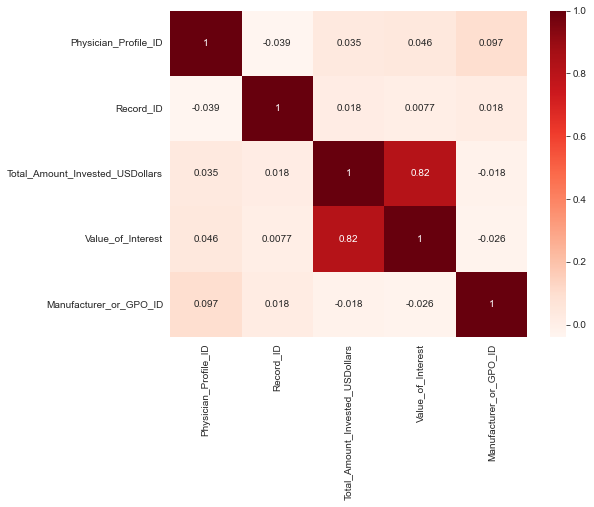

In [417]:
plt.figure(figsize=(8,6))
cor = investments_dropped.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/Users/marcusyeo/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    3205
-1      33
Name: anomaly, dtype: int64


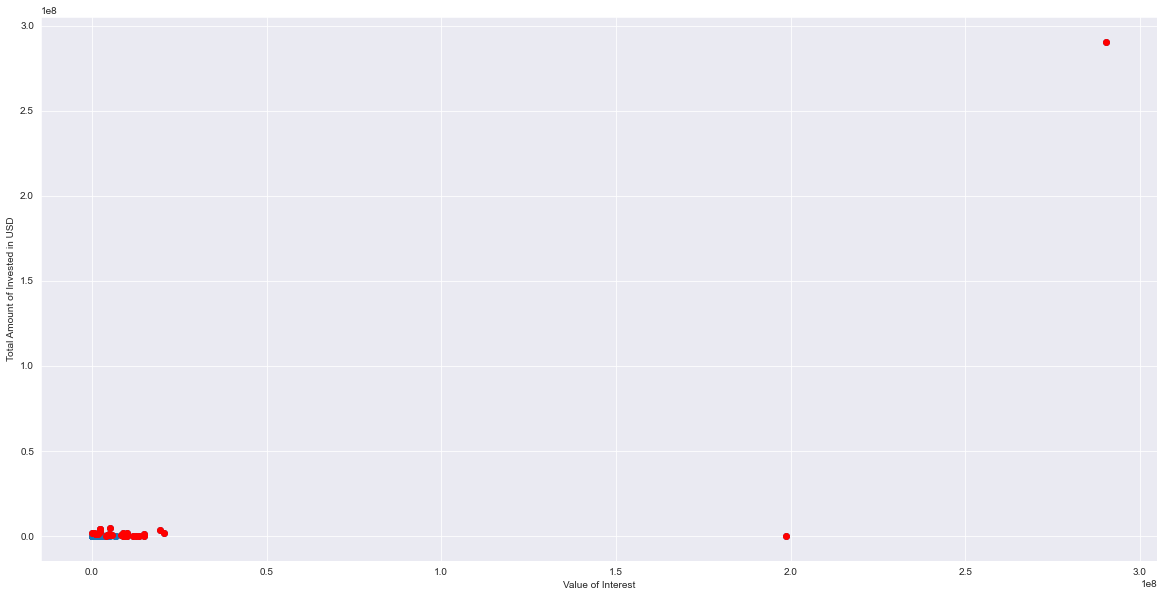

In [471]:
model2 = IsolationForest(contamination= 0.01, random_state = 101)
model2.fit(investments[['Value_of_Interest','Total_Amount_Invested_USDollars']])

investments['index'] = investments.index
investments['scores'] = model2.decision_function(investments[['Value_of_Interest','Total_Amount_Invested_USDollars']])
investments['anomaly'] = model2.predict(investments[['Value_of_Interest','Total_Amount_Invested_USDollars']])

print(investments['anomaly'].value_counts())
outlier_index2 = where(investments['anomaly'] == -1) 
outlier_values2 = investments.iloc[outlier_index2]

plt.figure(figsize=(20,10))
plt.scatter(investments['Value_of_Interest'],investments['Total_Amount_Invested_USDollars'])
plt.scatter(outlier_values2['Value_of_Interest'], outlier_values2['Total_Amount_Invested_USDollars'], c = "r")
plt.ylabel('Total Amount of Invested in USD')
plt.xlabel('Value of Interest')
plt.show()

In [472]:
outlier_index2

(array([ 261,  283,  349,  367,  376,  458,  459,  471,  738,  890, 1383,
        1387, 1625, 1878, 1879, 2001, 2002, 2003, 2005, 2171, 2224, 2291,
        2349, 2350, 2363, 2443, 2452, 2498, 2590, 2595, 2817, 2925, 2926]),)

In [473]:
investments.drop([ 261,  283,  349,  367,  376,  458,  459,  471,  738,  890, 1383,
                   1387, 1625, 1878, 1879, 2001, 2002, 2003, 2005, 2171, 2224, 2291,
                   2349, 2350, 2363, 2443, 2452, 2498, 2590, 2595, 2817, 2925, 2926], axis=0, inplace=True)

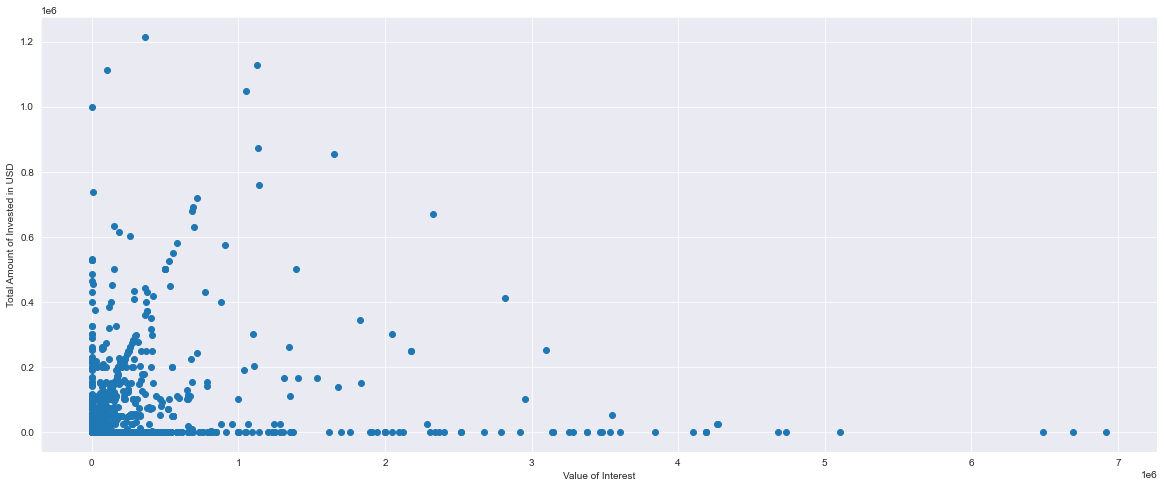

In [474]:
plt.figure(figsize=(20,8))
plt.scatter(investments['Value_of_Interest'],investments['Total_Amount_Invested_USDollars'])
plt.ylabel('Total Amount of Invested in USD')
plt.xlabel('Value of Interest')
plt.show()

In [475]:
investments['natural_log_voi'] = np.log(investments['Value_of_Interest'])
investments['natural_log_total'] = np.log(investments['Total_Amount_Invested_USDollars'])

/Users/marcusyeo/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [476]:
# plt.figure(figsize=(20,8))
# plt.scatter(data = investments,
#             x = 'natural_log_voi',
#             y = 'natural_log_total',
#             c = 'Physician_Specialty')
# plt.ylabel('Log Total Amount of Invested in USD')
# plt.xlabel('Log Value of Interest')
# plt.show()

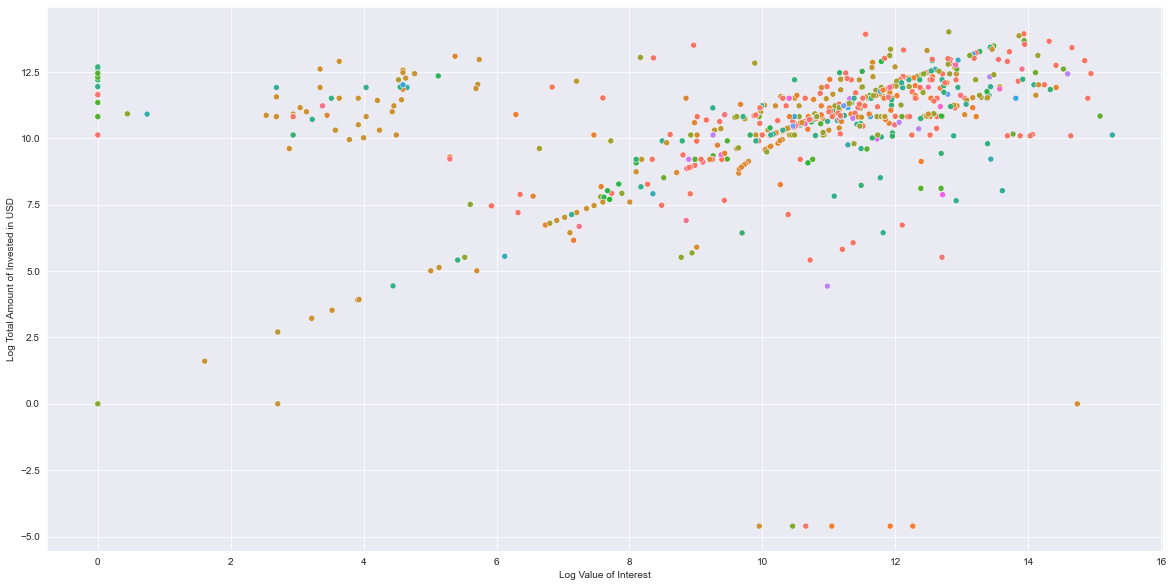

In [477]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = investments,
                x = 'natural_log_voi',
                y = 'natural_log_total',
                hue = 'Physician_Specialty')
plt.ylabel('Log Total Amount of Invested in USD')
plt.xlabel('Log Value of Interest')
plt.legend([],[], frameon=False)
plt.show()

In [437]:
# model = OneClassSVM(kernel = 'rbf', gamma = 'auto', nu = 0.005).fit(df_investments)

In [438]:
# y_pred = model.predict(df_investments)
# y_pred

In [439]:
# # filter outlier index
# outlier_index = where(y_pred == -1) 
# # filter outlier values
# outlier_values = df_investments.iloc[outlier_index]
# outlier_values

In [440]:
# # visualize outputs
# plt.scatter(df_investments['Total_Amount_Invested_USDollars'], df_investments['Value_of_Interest'])
# plt.scatter(outlier_values['Total_Amount_Invested_USDollars'], outlier_values['Value_of_Interest'], c = "r")
# plt.show()

## Research Dataset

In [447]:
research.head()

,Change_Type,Covered_Recipient_Type,Noncovered_Recipient_Entity,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Expenditure_Category3,Expenditure_Category4,Preclinical_Research_Ind,Delay_in_Publication_Ind,Name_of_Study,Record_ID,Payment_Publication_Date,ClinicalTrials_Gov_Identifier,Research_Information_Link,Context_of_Research
0,UNCHANGED,Covered Recipient Teaching Hospital,NaN,220110.0,8641.0,Brigham And Womens Hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,No,No,PE Study (PE) / Optalyse,734742797,01/21/2022,NCT02396758,NaN,NaN
1,UNCHANGED,Covered Recipient Teaching Hospital,NaN,310001.0,8837.0,HACKENSACK UNIVERSITY MEDICAL CENTER,NaN,NaN,NaN,NaN,...,NaN,NaN,No,No,"A Phase III, Randomized, Double-blind, Matchin...",740785267,01/21/2022,NaN,NaN,Equipment or non-drug supplies provided to a c...
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,NaN,Bernard,NaN,Ashby,NaN,...,NaN,NaN,No,No,DIAMOND PAT-CR-302,750382175,01/21/2022,NaN,NaN,NaN
3,UNCHANGED,Covered Recipient Teaching Hospital,NaN,50047.0,9847.0,CALIFORNIA PACIFIC MEDICAL CENTER,NaN,NaN,NaN,NaN,...,NaN,NaN,No,No,"A STUDY OF SAPANISERTIB, COMBINATION OF SAPANI...",737060227,01/21/2022,NaN,NaN,NaN
4,UNCHANGED,Covered Recipient Teaching Hospital,NaN,100258.0,9699.0,Delray Medical Center,NaN,NaN,NaN,NaN,...,NaN,NaN,No,No,KNOCOUT PE,734743057,01/21/2022,NCT03426124,NaN,NaN


### Using Pearson Correlation to get a sensing of different features

In [449]:
to_drop = ['Physician_Profile_ID',
           'Physician_License_State_code5',
           'Pr_Investigator_2_License_State_code4',
           'Pr_Investigator_2_License_State_code5',
           'Pr_Investigator_3_License_State_code3',
           'Pr_Investigator_3_License_State_code4',
           'Pr_Investigator_3_License_State_code5',
           'Pr_Investigator_4_License_State_code2',
           'Pr_Investigator_4_License_State_code3',
           'Pr_Investigator_4_License_State_code4',
           'Pr_Investigator_4_License_State_code5',
           'Pr_Investigator_5_License_State_code2',
           'Pr_Investigator_5_License_State_code3',
           'Pr_Investigator_5_License_State_code4',
           'Pr_Investigator_5_License_State_code5',
           'Expenditure_Category5',
           'Expenditure_Category6']

research.drop(columns=to_drop,inplace=True)

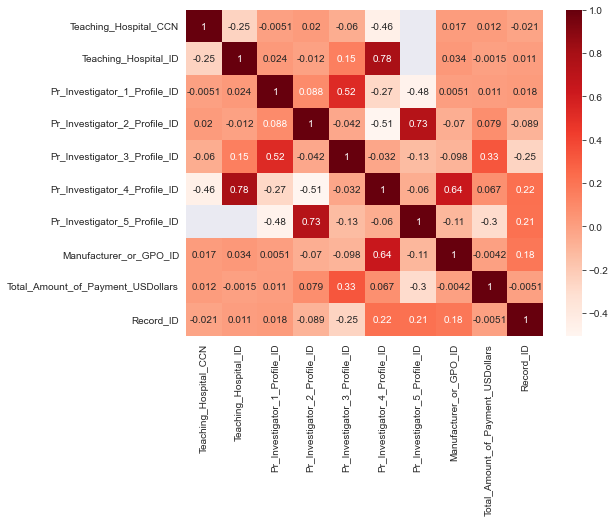

In [451]:
plt.figure(figsize=(8,6))
cor = research.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()